In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from energy_consumption.feature_selection.clean.impute_outliers import impute_outliers

In [12]:
energy_data = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')[-40000:]
energy_data['date_time'] = pd.to_datetime(
    energy_data['date_time'], format='%Y-%m-%d %H:%M:%S')
energy_data = energy_data.set_index("date_time")
energy_data = impute_outliers(energy_data)

energy_data['weekday'] = energy_data.index.weekday  # monday = 0, sunday = 6
energy_data['hour'] = energy_data.index.hour
energy_data['month'] = energy_data.index.month
energy_data.head()

,energy_consumption,weekday,hour,month
date_time,,,,
2019-04-30 21:00:00,56.22825,1,21,4
2019-04-30 22:00:00,52.27475,1,22,4
2019-04-30 23:00:00,48.06725,1,23,4
2019-05-01 00:00:00,44.67150,2,0,5
2019-05-01 01:00:00,42.50650,2,1,5


In [13]:
energy_data

,energy_consumption,weekday,hour,month
date_time,,,,
2019-04-30 21:00:00,56.22825,1,21,4
2019-04-30 22:00:00,52.27475,1,22,4
2019-04-30 23:00:00,48.06725,1,23,4
2019-05-01 00:00:00,44.67150,2,0,5
2019-05-01 01:00:00,42.50650,2,1,5
...,...,...,...,...
2023-11-22 08:00:00,65.75125,2,8,11
2023-11-22 09:00:00,67.40950,2,9,11
2023-11-22 10:00:00,68.26775,2,10,11


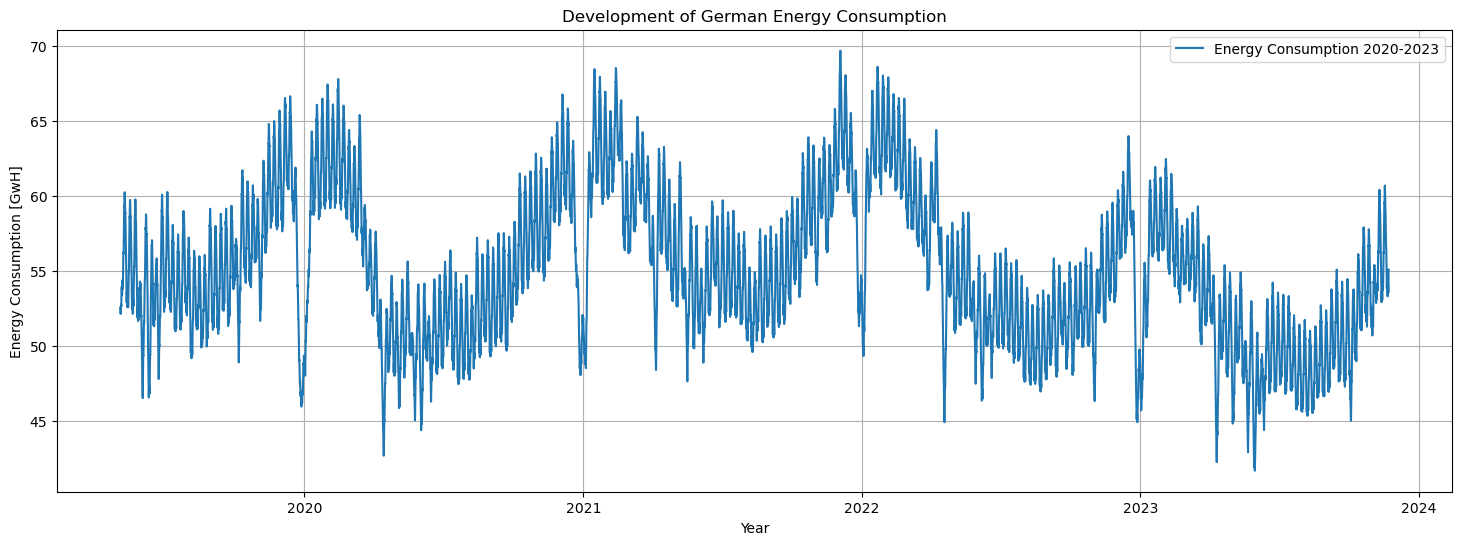

In [15]:
window_size = 100  # Adjust as needed
energy_data['smoothed'] = energy_data['energy_consumption'].rolling(
    window=window_size).mean()

energy_data = energy_data.reset_index()
plt.figure(figsize=(18, 6))
plt.plot(energy_data['date_time'], energy_data['smoothed'],
         label='Energy Consumption 2020-2023')
plt.xlabel('Year')
plt.ylabel('Energy Consumption [GwH]')
plt.title('Development of German Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

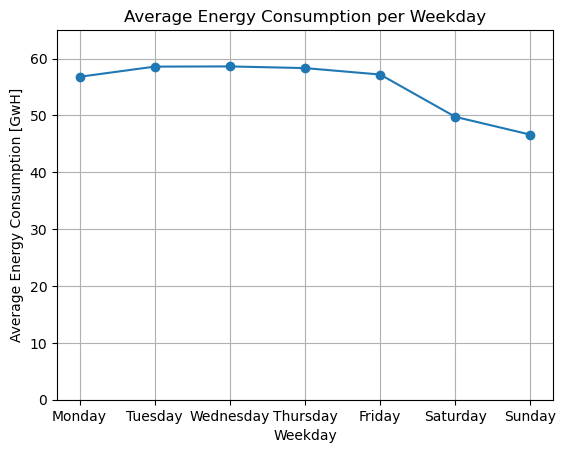

In [16]:
# plot average energy consumption throughout week

energy_data_per_weekday = energy_data.groupby(
    by='weekday')['energy_consumption'].mean()
energy_data_per_weekday = energy_data_per_weekday.to_frame().reset_index()

# define the weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday',
            'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create bar plot
plt.plot(weekdays, energy_data_per_weekday.loc[:,
         'energy_consumption'], marker='o', linestyle='-')
plt.xlabel('Weekday')
plt.ylabel('Average Energy Consumption [GwH]')
plt.title('Average Energy Consumption per Weekday')
plt.grid(True)  # Add grid lines
plt.ylim(0, 65)
plt.show()

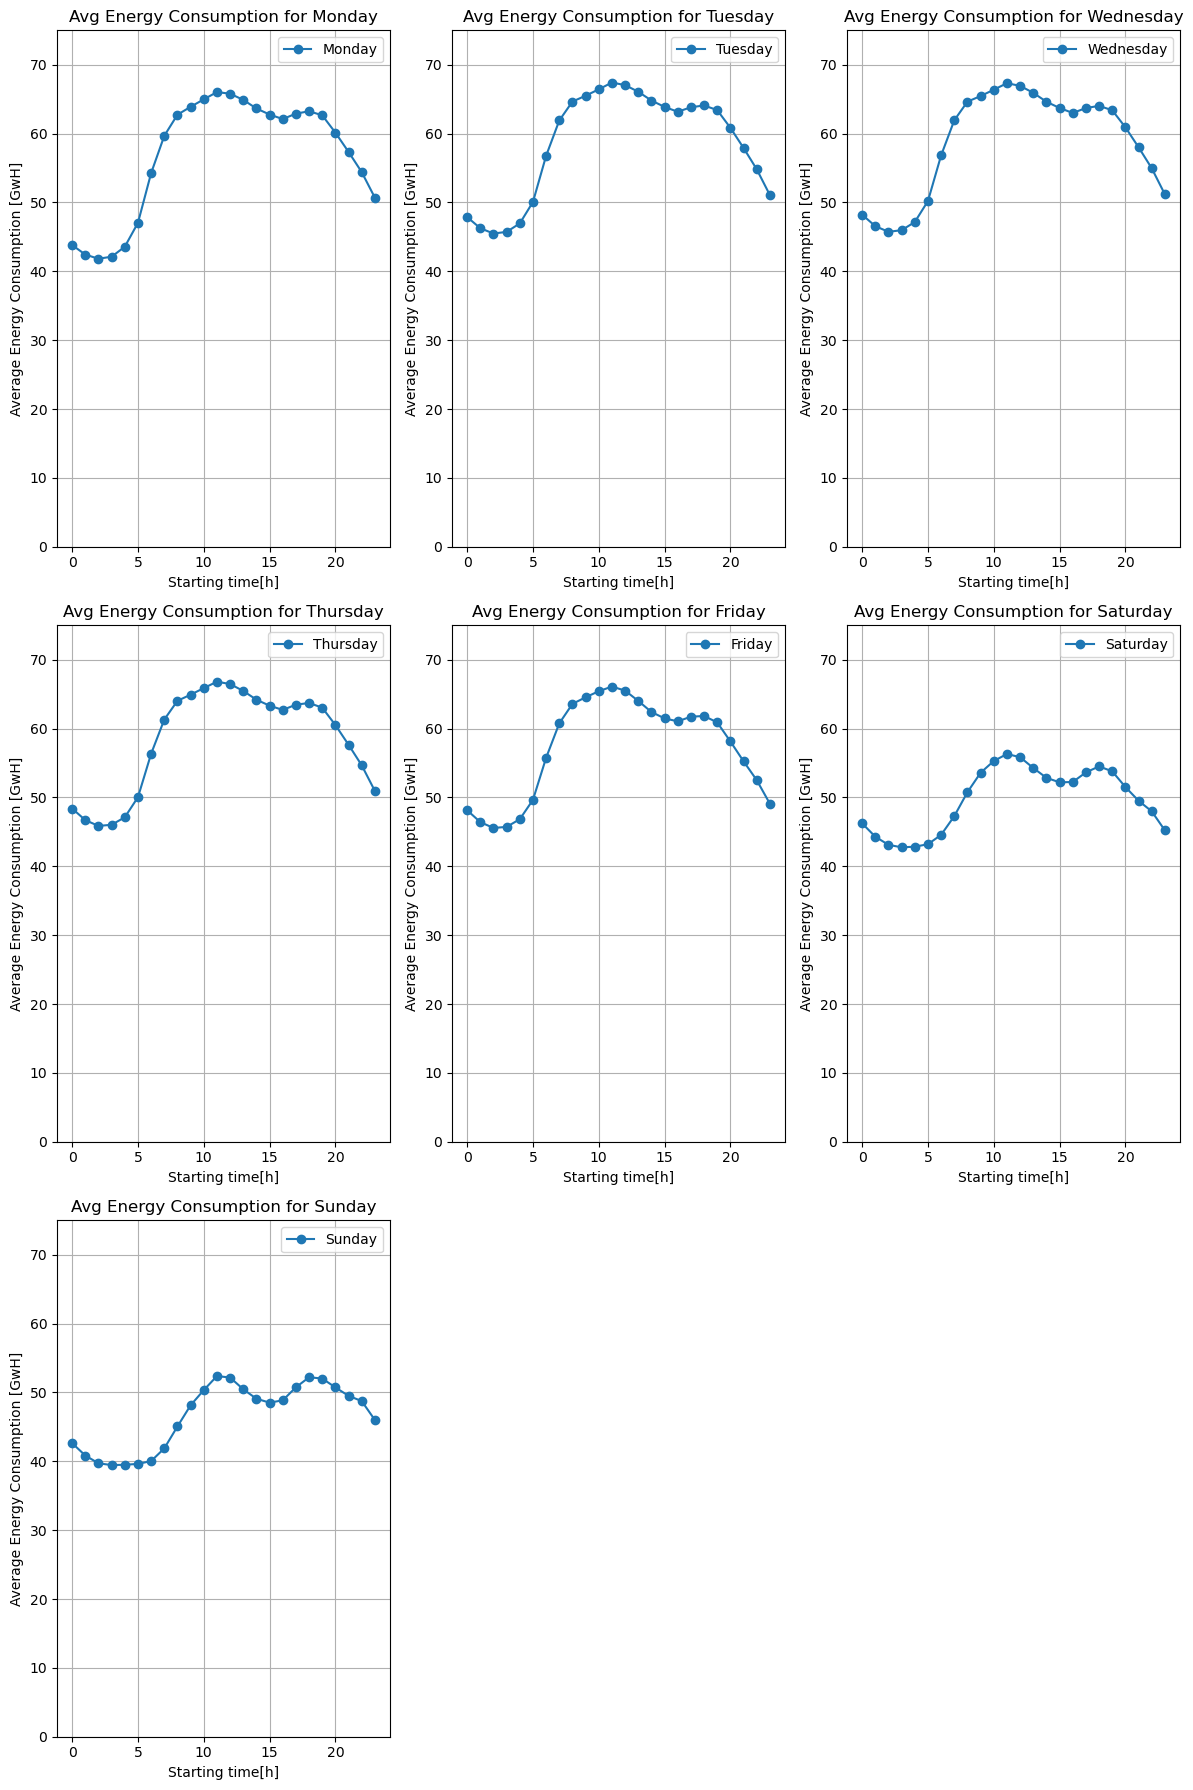

In [18]:
energy_data_per_day_hour_and_weekday = energy_data.groupby(
    ['weekday', 'hour'])['energy_consumption'].mean().unstack()

# Create subplots with two or three plots in a row
num_weekdays = len(weekdays)
num_plots_per_row = 3
num_rows = (num_weekdays + num_plots_per_row - 1) // num_plots_per_row
hours = range(24)
# Set the figure size based on the number of rows and plots per row
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(12, 6*num_rows))

for day, ax in zip(range(num_weekdays), axes.flatten()):
    ax.plot(hours, energy_data_per_day_hour_and_weekday.loc[day, :],
            marker='o', linestyle='-', label=weekdays[day])
    ax.set_xlabel('Starting time[h]')
    ax.set_ylabel('Average Energy Consumption [GwH]')
    ax.set_title(f'Avg Energy Consumption for {weekdays[day]}')
    ax.grid(True)
    ax.set_ylim(0, 75)
    ax.legend()

# Hide any empty subplots
for i in range(num_weekdays, num_rows * num_plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust subplot spacing
plt.show()

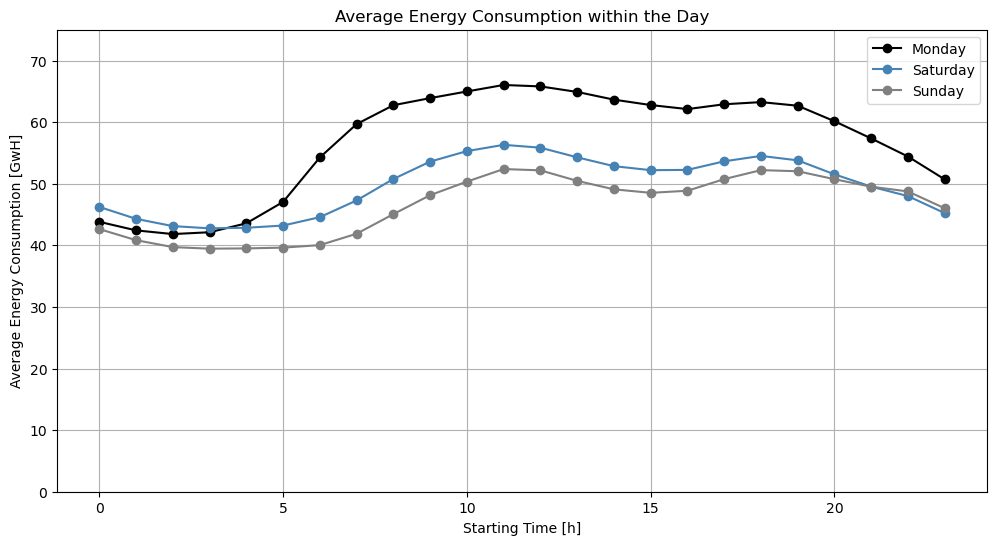

In [22]:
selected_weekdays = ['Monday', 'Saturday', 'Sunday']
colors = ['black', 'steelblue', 'grey']  # Colors for Monday, Saturday, and Sunday

plt.figure(figsize=(12, 6))

for day, color in zip(selected_weekdays, colors):
    day_index = weekdays.index(day)
    plt.plot(hours, energy_data_per_day_hour_and_weekday.loc[day_index, :],
             marker='o', linestyle='-', label=day, color=color)

plt.xlabel('Starting Time [h]')
plt.ylabel('Average Energy Consumption [GwH]')
plt.title('Average Energy Consumption within the Day')
plt.grid(True)
plt.ylim(0, 75)
plt.legend()
plt.show()